In [ ]:
! pip install -q bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 11.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 53.6 M

In [ ]:
from datasets import load_dataset

dataset = load_dataset("tweet_eval", "offensive")

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/11916 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/860 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1324 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 11916
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 860
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1324
    })
})

In [ ]:
train_ds = dataset["train"]
train_ds[0]

{'text': '@user Bono... who cares. Soon people will understand that they gain nothing from following a phony celebrity. Become a Leader of your people instead or help and support your fellow countrymen.',
 'label': 0}

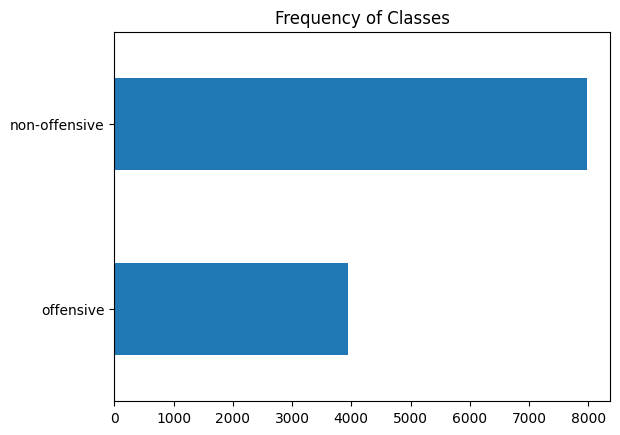

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dataset.set_format(type="pandas")
df = dataset["train"][:]

def label_int2str(row):
    return dataset["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [ ]:
from bertopic import BERTopic
from umap import UMAP

umap_model = UMAP(random_state=42)

topic_model = BERTopic(umap_model=umap_model)

In [ ]:
train_docs = dataset["train"]['text']
train_classes = dataset["train"]['label']
test_docs = dataset["test"]['text']
test_classes = dataset["test"]['label']
valid_docs = dataset["validation"]['text']
valid_classes = dataset["validation"]['label']

In [ ]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, embedding_model="all-MiniLM-L6-v2")
topics, probs = topic_model.fit_transform(train_docs)

Batches:   0%|          | 0/373 [00:00<?, ?it/s]

2023-11-01 16:33:05,770 - BERTopic - Transformed documents to Embeddings
2023-11-01 16:33:49,022 - BERTopic - Reduced dimensionality
2023-11-01 16:34:02,575 - BERTopic - Clustered reduced embeddings


In [ ]:
topic_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,-1,4535,-1_is_he_she_you,"[is, he, she, you, to, and, the, are, of, it]",[@user Did you hear that @user had a game take...
1,0,1083,0_antifa_user_they_the,"[antifa, user, they, the, of, and, fascist, vi...",[@user @user @user @user Yet they haven't. How...
2,1,995,1_gun_control_guns_laws,"[gun, control, guns, laws, about, the, in, chi...",[@user GUN CONTROL WILL NOT STOP GUN VIOLENCE ...
3,2,427,2_liberals_liberal_they_their,"[liberals, liberal, they, their, user, all, ar...","[@user Liberals will liberal!, @user @user Lib..."
4,3,307,3_right_user_wrong_correct,"[right, user, wrong, correct, are, you, what, ...",[@user You should seriously consider that mayb...
...,...,...,...,...,...
120,119,11,119_ford_dr_claims_letter,"[ford, dr, claims, letter, say, roughed, sheis...",[@user My guess a lot of unflattering facts wi...
121,120,11,120_worst_terrible_worse_js,"[worst, terrible, worse, js, gonna, exciting, ...","[@user He is the worst person., @user You are ..."
122,121,10,121_back_gone_murdock_dawg,"[back, gone, murdock, dawg, chanting, dammit, ...",[@user I hope he can get back too ND🍀 Days He ...
123,122,10,122_schiff4brains_criminal_jail_attorney,"[schiff4brains, criminal, jail, attorney, drai...",[Louisiana Attorney General Jeff Landry encour...


In [ ]:
topic_model.get_topic(0)

[('antifa', 0.04045320709999825),
 ('user', 0.010318131939897716),
 ('they', 0.007872688778940611),
 ('the', 0.00732450084558681),
 ('of', 0.007081797784075822),
 ('and', 0.0068809087520569365),
 ('fascist', 0.006346910340377874),
 ('violence', 0.006308435068036173),
 ('to', 0.006308127282937563),
 ('left', 0.006306778967857455)]

In [ ]:
embeddings = []
for topic in topic_model.get_topics().values():
    topic_embeddings = []
    for i in range(len(topic) - 1):
        for j in range(i + 1, len(topic)):
            topic_embeddings.append([topic[j][0], topic[i][0]])
    embeddings.append(topic_embeddings)
print(embeddings)

[[['he', 'is'], ['she', 'is'], ['you', 'is'], ['to', 'is'], ['and', 'is'], ['the', 'is'], ['are', 'is'], ['of', 'is'], ['it', 'is'], ['she', 'he'], ['you', 'he'], ['to', 'he'], ['and', 'he'], ['the', 'he'], ['are', 'he'], ['of', 'he'], ['it', 'he'], ['you', 'she'], ['to', 'she'], ['and', 'she'], ['the', 'she'], ['are', 'she'], ['of', 'she'], ['it', 'she'], ['to', 'you'], ['and', 'you'], ['the', 'you'], ['are', 'you'], ['of', 'you'], ['it', 'you'], ['and', 'to'], ['the', 'to'], ['are', 'to'], ['of', 'to'], ['it', 'to'], ['the', 'and'], ['are', 'and'], ['of', 'and'], ['it', 'and'], ['are', 'the'], ['of', 'the'], ['it', 'the'], ['of', 'are'], ['it', 'are'], ['it', 'of']], [['user', 'antifa'], ['they', 'antifa'], ['the', 'antifa'], ['of', 'antifa'], ['and', 'antifa'], ['fascist', 'antifa'], ['violence', 'antifa'], ['to', 'antifa'], ['left', 'antifa'], ['they', 'user'], ['the', 'user'], ['of', 'user'], ['and', 'user'], ['fascist', 'user'], ['violence', 'user'], ['to', 'user'], ['left', 'use

In [ ]:
from gensim.models.poincare import PoincareModel
from nltk.corpus import wordnet as wn
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
flat_list = [item for sublist in embeddings for embedding in sublist for item in embedding]

# Get unique words
vocab = list(set(flat_list))

print(vocab)

['pregnancy', 'nike', 'liberals', 'magaforallinc', 'birthday', 'justice', 'using', 'wendys', 'allusion', 'hollywood', 'pls', 'knocked', 'oath', 'unwilling', 'about', 'daffy', 'tweets', 'sidekick', 'marie', 'fry', 'follow', 'champion', 'strauss', 'racist', 'doings', 'cents', 'religion', 'fuckin', 'rican', 'media', 'concerns', 'ever', 'lowest', '18', 'canadians', 'music', 'sexual', 'shit', 'by', 'trump2020', 'doctor', 'ford', 'senate', 'robert', 'scary', 'abominable', 'jobs', 'harry', 'guts', 'fbi', 'holding', 'partisan', 'keep', 'mews', 'what', 'kag2018', 'rebounded', 'police', 'levis', 'beloved', 'dead', 'riddance', 'alcohol', 'denounced', 'steel', 'network', 'pakistan', 'investigate', 'frosty', 'millionaires', 'conservatives', 'so', 'glorious', 'prison', 'texas', 'tried', 'hispanics', 'journalists', 'spiders', 'judges', 'ok', 'research', 'trumptrain', 'suck', 'rm20', 'im', 'donald', 'we', 'disgusting', 'followed', 'blasphemy', 'knight', 'hats', 'quality', 'russia', 'roadworks', 'cough

In [ ]:
relations = []
def get_hypernym_relations(word, relations):
    """Get hypernym relations for a word."""
    for synset in wn.synsets(word):
        for hypernym in synset.hypernyms():
            hyp = [synset.lemmas()[0].name(), hypernym.lemmas()[0].name()]
            if len(hyp) != 0:
              relations.append(hyp)
    return relations

for v in vocab:
  get_hypernym_relations(f'{v}', relations)
print(relations)

[['pregnancy', 'physical_condition'], ['liberal', 'adult'], ['liberal', 'adult'], ['birthday', 'anniversary'], ['birthday', 'date'], ['justice', 'natural_virtue'], ['justice', 'righteousness'], ['justice', 'judgment'], ['judge', 'adjudicator'], ['judge', 'official'], ['Department_of_Justice', 'executive_department'], ['exploitation', 'mistreatment'], ['use', 'consume'], ['use', 'exploit'], ['use', 'act'], ['allusion', 'mention'], ['Hollywood', 'film_industry'], ['Hollywood', 'spirit'], ['knock', 'strike'], ['knock', 'rap'], ['bump', 'hit'], ['tap', 'sound'], ['pink', 'sound'], ['knock', 'comment'], ['curse', 'profanity'], ['oath', 'commitment'], ['oath', 'promise'], ['tweet', 'chirp'], ['tweet', 'sound'], ['pinch', 'grip'], ['buddy', 'friend'], ['child', 'juvenile'], ['fry', 'heat'], ['fry', 'cook'], ['electrocute', 'kill'], ['follow', 'travel'], ['follow', 'result'], ['follow', 'travel'], ['comply', 'obey'], ['follow', 'result'], ['follow', 'imitate'], ['follow', 'be'], ['adopt', 'cho